Importing Libraries

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/House Price India.csv')

**Preprocessing the Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number_of_bedrooms                     14620 non-null  int64  
 3   number_of_bathrooms                    14620 non-null  float64
 4   living_area                            14620 non-null  int64  
 5   lot_area                               14620 non-null  int64  
 6   number_of_floors                       14620 non-null  float64
 7   waterfront_present                     14620 non-null  int64  
 8   number_of_views                        14620 non-null  int64  
 9   condition_of_the_house                 14620 non-null  int64  
 10  grade_of_the_house                     14620 non-null  int64  
 11  Ar

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number_of_bedrooms                     14620 non-null  int64  
 3   number_of_bathrooms                    14620 non-null  float64
 4   living_area                            14620 non-null  int64  
 5   lot_area                               14620 non-null  int64  
 6   number_of_floors                       14620 non-null  float64
 7   waterfront_present                     14620 non-null  int64  
 8   number_of_views                        14620 non-null  int64  
 9   condition_of_the_house                 14620 non-null  int64  
 10  grade_of_the_house                     14620 non-null  int64  
 11  Ar

In [34]:
X = df.drop('Price', axis=1)  # remove target column from input features
y = df["Price"]  # extract target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number_of_bedrooms                     14620 non-null  int64  
 3   number_of_bathrooms                    14620 non-null  float64
 4   living_area                            14620 non-null  int64  
 5   lot_area                               14620 non-null  int64  
 6   number_of_floors                       14620 non-null  float64
 7   waterfront_present                     14620 non-null  int64  
 8   number_of_views                        14620 non-null  int64  
 9   condition_of_the_house                 14620 non-null  int64  
 10  grade_of_the_house                     14620 non-null  int64  
 11  Ar

In [38]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11696, 22)
(2924, 22)
(11696,)
(2924,)


Model Building

In [40]:
model = Sequential() 
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model = Sequential([
#1st input layer
Dense(256, activation='relu', input_shape=(X.shape[1],)),
# 2nd hidden layers
Dense(128, activation='relu'),
Dense(64, activation='relu'),
Dense(32, activation='relu'),
#3rd output layer
Dense(1, activation='sigmoid'),
])


In [52]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [53]:
history = model.fit(X_train,y_train,batch_size=32,epochs=30, validation_data=(X_test,y_test))

Epoch 1/30
366/366 [==============================] - 2s 3ms/step - loss: 536306.3750 - mse: 419443605504.0000 - val_loss: 549429.5625 - val_mse: 449814429696.0000
Epoch 2/30
366/366 [==============================] - 1s 2ms/step - loss: 536306.1875 - mse: 419443539968.0000 - val_loss: 549429.5625 - val_mse: 449814429696.0000
Epoch 3/30
366/366 [==============================] - 1s 2ms/step - loss: 536306.5000 - mse: 419443703808.0000 - val_loss: 549429.5625 - val_mse: 449814429696.0000
Epoch 4/30
366/366 [==============================] - 1s 3ms/step - loss: 536306.5000 - mse: 419443572736.0000 - val_loss: 549429.5625 - val_mse: 449814429696.0000
Epoch 5/30
366/366 [==============================] - 1s 2ms/step - loss: 536306.6875 - mse: 419443376128.0000 - val_loss: 549429.5625 - val_mse: 449814429696.0000
Epoch 6/30
366/366 [==============================] - 1s 2ms/step - loss: 536306.8125 - mse: 419443343360.0000 - val_loss: 549429.5625 - val_mse: 449814429696.0000
Epoch 7/30
366/3

In [43]:
from keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

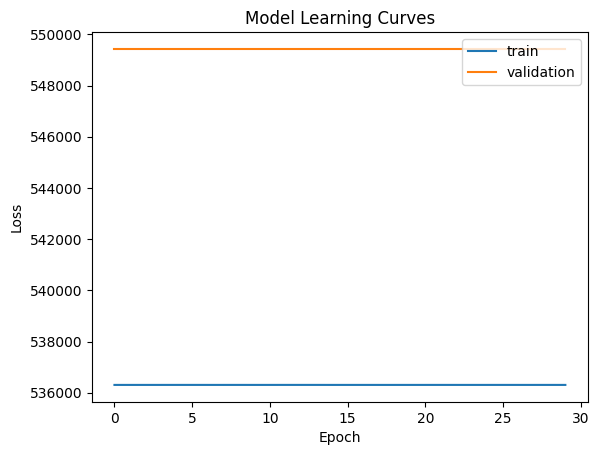

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Learning Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Testing the Model

In [56]:
mse,mae=model.evaluate(X_test,y_test)
print(mse)
print(mae)

92/92 [==============================] - 0s 1ms/step - loss: 549429.5625 - mse: 449814429696.0000
549429.5625
449814429696.0


<Axes: >

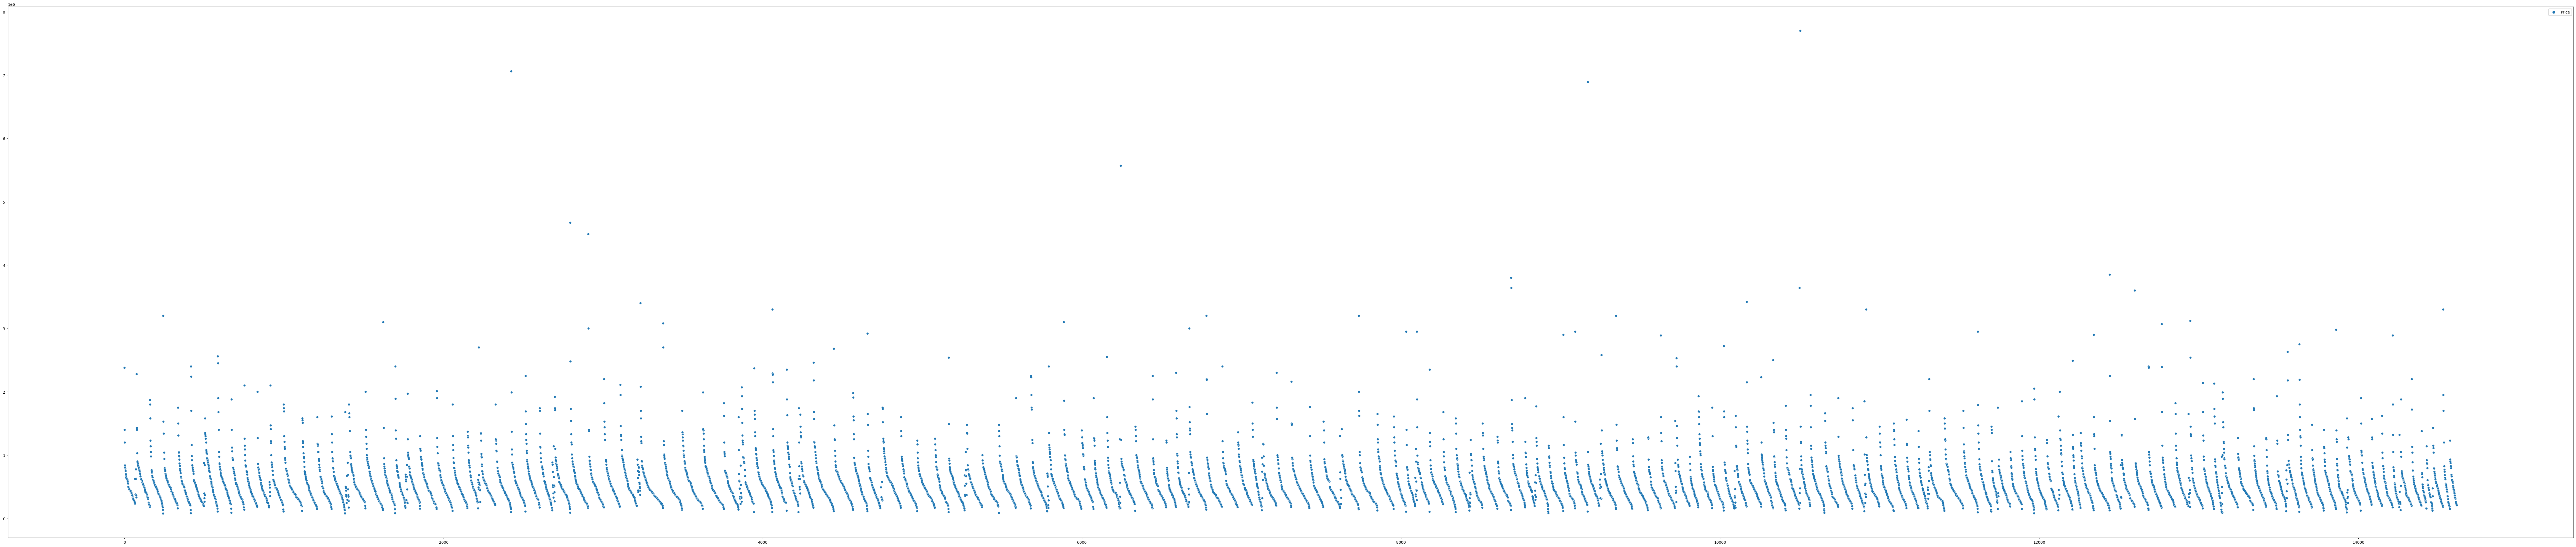

In [33]:
import seaborn as sns
fig = plt.figure(figsize=(120,25))
result = (y_test,y_train)
sns.scatterplot(result)